# Exploratory Data Analysis of Tik Tok Data
---
Notebook Summary Report
Commission Prepared by **TikTok** 3rd Project EDA.

#### Proyect Overview

A key component of this project’s exploratory data analysis involves visualizing the data. As illustrated in the following histograms, it is clear that the vast majority of videos are grouped at the bottom of the range of values for three variables that showcase TikTok users (video viewers’) engagement with the videos included in this dataset.

**The Problem**

The TikTok data team seeks to develop a machine learning model to assist in the classification of claims for user submissions. In this part of the project, the data needs to be analyzed, explored, cleaned, and structured prior to any model building.

**Proposed solution** 

The TikTok data team conducted exploratory data analysis at this stage. The purpose of the exploratory data analysis was to understand the impact that videos have on TikTok users. To do so, the TikTok data team analyzed variables that would showcase user engagement: view, like, and comment count.

**Visuals** Included in this notebook

**Keys to success**

In this notebook we will observe that according to the findings from the exploratory data analysis, the future claim classification model will need to account for null values and imbalance in opinion video counts by incorporating them into the model parameters. 
There is a need for handling other outliers, and balance.

**Next Steps**

We have null values in 7 different columns. As a result, future modeling should consider the null values to avoid making insights that would assume complete data. Further analysis is necessary to investigate the reason for these null values, and their impact on future statistical analysis or model building.

The following will explain the previous notes.

## Steps

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. 
The mission is to continue the investigation we began in last notebook [notebook](http://localhost:8888/lab/tree/automatidata/pythonDS/automatidataProject2.ipynb) and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** Clean data set and create a visualization.

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
* Data cleaning
  - Determineate state of the data observing:
    - Data types.
    - Missing information.
    - Validate inputs.
    - Distributions.
    - Detrminate Outliers, Do we keep/delete them?.
    - Verify as we go.


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

* Determinate if transformations or restructurizations are neccesary
    
    - Creation of new columns based on known information.
    - Construct Visualizations
    - Determinate insights, recommendations, new formulated questions from the observed.


Follow the instructions and answer the questions. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.


## Notes in Outliers

1. Identifing outliers:

  * Statistical analysis, Descriptors of tendency, disperssion, location.
  * Boxplot to visualize the distribution of the data
  * Histograms to visualize the distribution of the data
  
**Options:**

- **Delete** them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
- **Reassign** them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
- **Leave** them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

Different type of model have different assumptions. There is no right answer only based after model selection.

In [62]:
## This are the packages that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import exploratory_data_analysis.eda_functions as eda ## house EDA functions, and a work in progress.
## For encoding
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import scipy

import datetime as dt

import warnings as cuidado
cuidado.filterwarnings('ignore')

In [63]:
path = '/home/scicat/Downloads/coursera/TikTok/pythonDS/tiktok_dataset.csv'
df = pd.read_csv(path)
df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


#### Reminder of the features and its characteristics

**#**, int,  

TikTok assigned number for video with claim/opinion.

**claim_status**, obj, 

Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source.

**video_id**,int, 

Random identifying number assigned to video upon publication on TikTok.

**video_duration_sec**, int, 

How long the published video is measured in seconds.

**video_transcription_text**, obj, 

Transcribed text of the words spoken in the published video.

**verified_status**, obj, 

Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.” 

**author_ban_status'**, obj, 

Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.” 

**video_view_count**, float, 

The total number of times the published video has been viewed. 

**video_like_count**,  float, 

The total number of times the published video has been liked by other users. 

**video_share_count**, float, 

The total number of times the published video has been shared by other users. 

**video_download_count**, float, 

The total number of times the published video has been downloaded by other users. 

**video_comment_count** float, 

The total number of comments on the published video. 

In [64]:
## information about the data object, data types, shape,
## column names, non null counts, and more.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [65]:
## Observing the nulls and invalid values
## from the dataset
eda.get_invalid_values(df)

,nulls,invalids,unique_item
#,0,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
claim_status,298,298,"[claim, opinion, nan]"
video_id,0,0,"[7017666017, 4014381136, 9859838091, 186684799..."
video_duration_sec,0,0,"[59, 32, 31, 25, 19, 35, 16, 41, 50, 45, 47, 3..."
video_transcription_text,298,298,[someone shared with me that drone deliveries ...
verified_status,0,0,"[not verified, verified]"
author_ban_status,0,0,"[under review, active, banned]"
video_view_count,298,298,"[343296.0, 140877.0, 902185.0, 437506.0, 56167..."
video_like_count,298,298,"[19425.0, 77355.0, 97690.0, 239954.0, 34987.0,..."
video_share_count,298,298,"[241.0, 19034.0, 2858.0, 34812.0, 4110.0, 6230..."


In [66]:
## Observing Not a numbers.
## 
eda.miss_df(df)

,Total,Percent
claim_status,298,1.537509
video_transcription_text,298,1.537509
video_view_count,298,1.537509
video_like_count,298,1.537509
video_share_count,298,1.537509
video_download_count,298,1.537509
video_comment_count,298,1.537509
#,0,0.000000
video_id,0,0.000000
video_duration_sec,0,0.000000


#### So far we can corfirm from the last notebook [Initial exploration](http://localhost:8888/lab/tree/TikTok/pythonDS/tiktokProject2.ipynb) that we are missing data
#### Lets also observe statistics

In [67]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


#### Review:

The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions.

There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that:

* Claim videos are more strictly policed than opinion videos

* Authors must comply with a stricter set of rules if they post a claim than if they post an opinion

Also, it should be noted that there's no way of knowing if claim videos are inherently more likely than opinion videos to result in author bans, or if authors who post claim videos are more likely to post videos that violate terms of service.

Finally, while we can use this data to draw conclusions about banned/active authors, we cannot draw conclusions about banned videos. There's no way of determining whether a particular video _caused_ the ban, and banned authors could have posted videos that complied with the terms of service.


#### `author_ban_status`.

* Banned authors and those under review get far more views, likes, and shares than active authors.
* In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

We created and will recreate three new columns to help better understand engagement rates:

* `likes_per_view`: represents the number of likes divided by the number of views for each video
* `comments_per_view`: represents the number of comments divided by the number of views for each video
* `shares_per_view`: represents the number of shares divided by the number of views for each video

We know that videos by banned authors and those under review tend to get far more views, likes, and shares than videos by non-banned authors. However, *when a video does get viewed*, its engagement rate is less related to author ban status and more related to its claim status.

Also, we know that claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.

Note that for claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.

* Of the 19,382 samples in this dataset, just over 50% are claims ;9,608 of them.  
* Engagement level is strongly correlated with claim status. This should be a focus of further inquiry.
* Videos with banned authors have significantly higher engagement than videos with active authors. Videos with authors under review fall between these two categories in terms of engagement levels.

In [68]:
## the missing values are a very little PCT of the total 
## lets drop them
df.dropna(inplace=True)

claim      9608
opinion    9476
Name: claim_status, dtype: int64


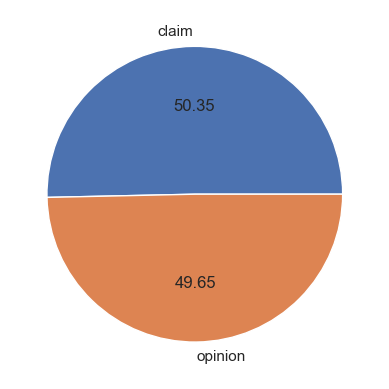

In [69]:
print(df['claim_status'].value_counts())
df.groupby('claim_status').size().plot(kind='pie', autopct='%.2f');

In [70]:
df.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

In [71]:
df.groupby(['author_ban_status']).agg(
    {'video_view_count': ['count', 'mean', 'median'],
     'video_like_count': ['count', 'mean', 'median'],
     'video_share_count': ['count', 'mean', 'median']
     })

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

In [72]:
## Creating a likes_per_view column
df['likes_per_view'] = df['video_like_count'] / df['video_view_count']

# Creating a comments_per_view column
df['comments_per_view'] = df['video_comment_count'] / df['video_view_count']

# Creating a shares_per_view column
df['shares_per_view'] = df['video_share_count'] / df['video_view_count']

In [73]:
df.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

#### **Constructing** visual observations 

In [74]:
continious =[
    'video_duration_sec',
    'video_view_count',
    'video_like_count',
    'video_share_count',
    'video_download_count',
    'video_comment_count',
    'likes_per_view',
    'comments_per_view',
]
nominal =[
    'author_ban_status',
    
]
binary =[
    'claim_status', 
    'verified_status',
]

txt = [
    'video_transcription_text',
]

active          15383
under review     2066
banned           1635
Name: author_ban_status, dtype: int64


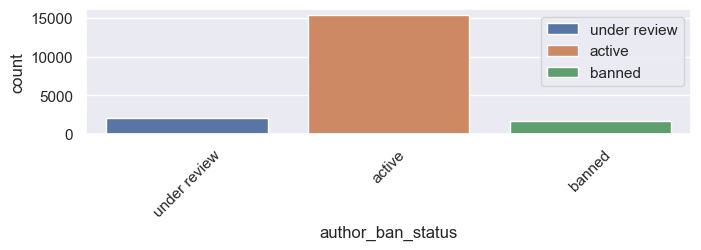

claim      9608
opinion    9476
Name: claim_status, dtype: int64


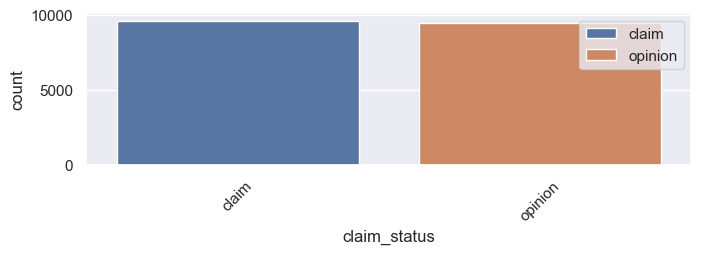

not verified    17884
verified         1200
Name: verified_status, dtype: int64


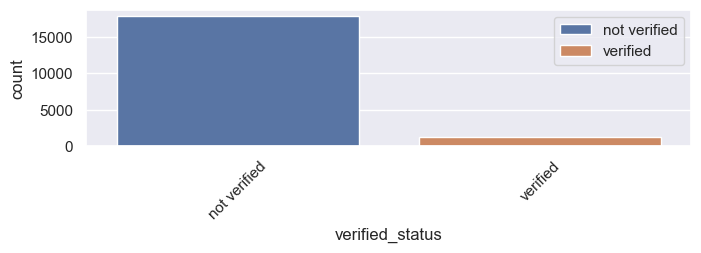

In [75]:
## Observing the counts per categoty
for cat in nominal + binary:
    print(df[cat].value_counts())
    plt.figure(figsize = (8.48,4)) #18, 8
    ax = sns.countplot(x=df[cat], label=df[cat].unique());
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout(pad=5.0)
    plt.show()

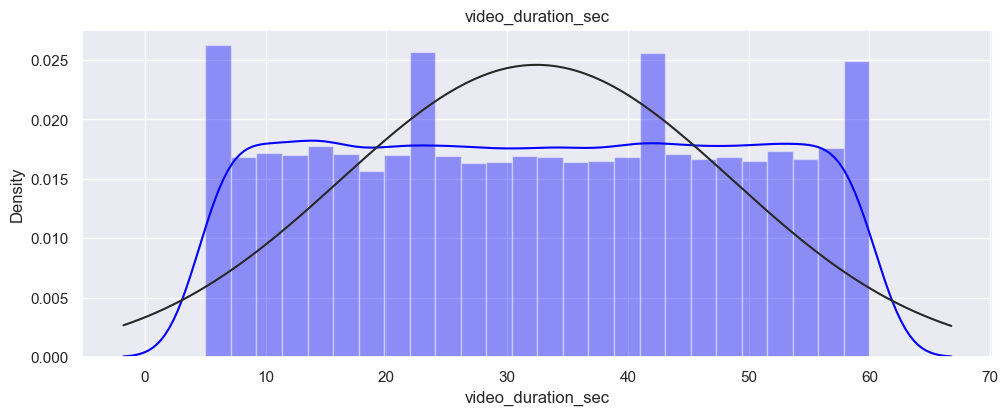

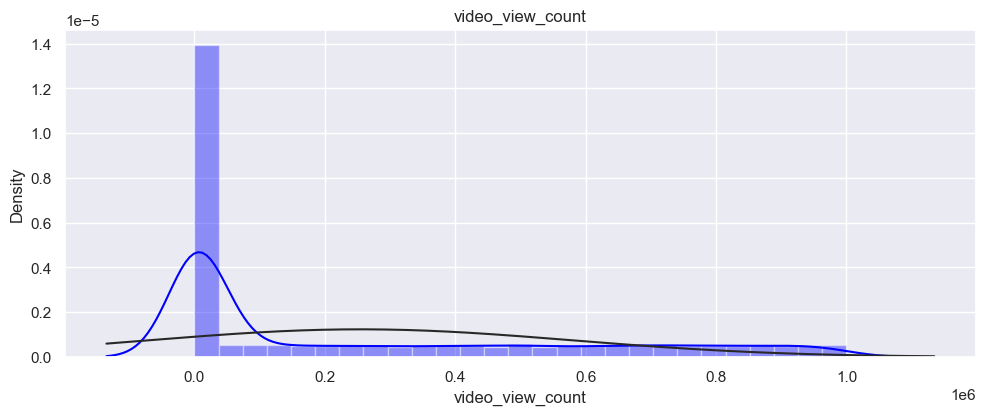

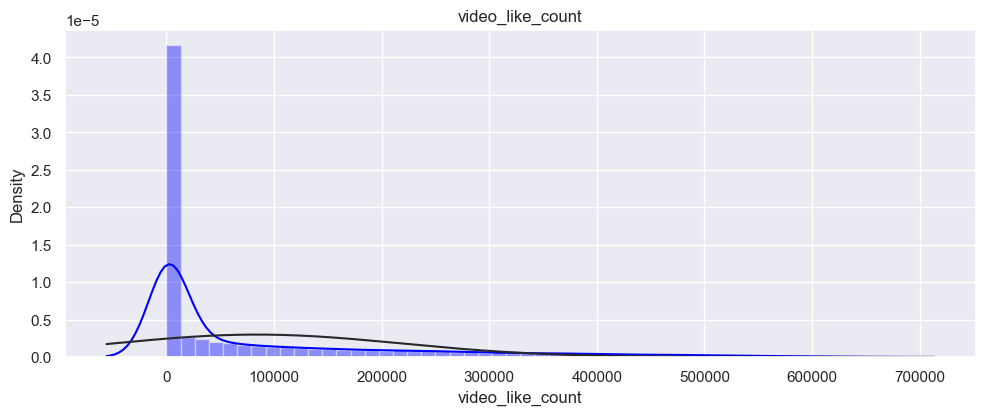

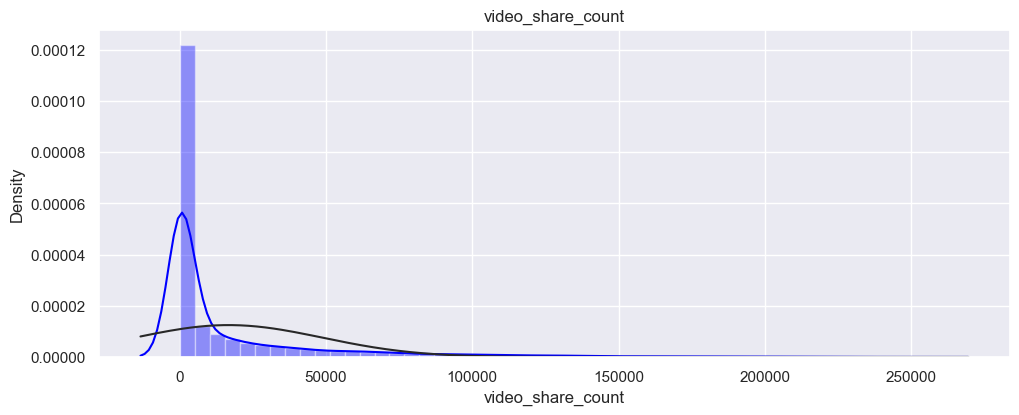

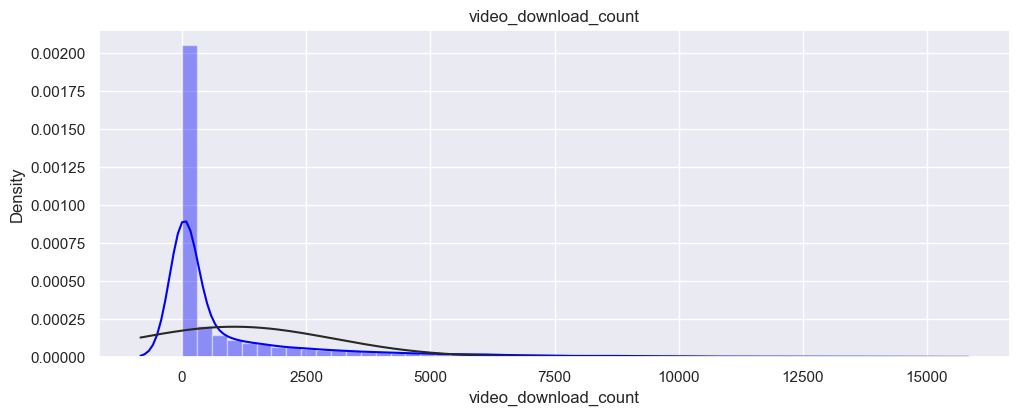

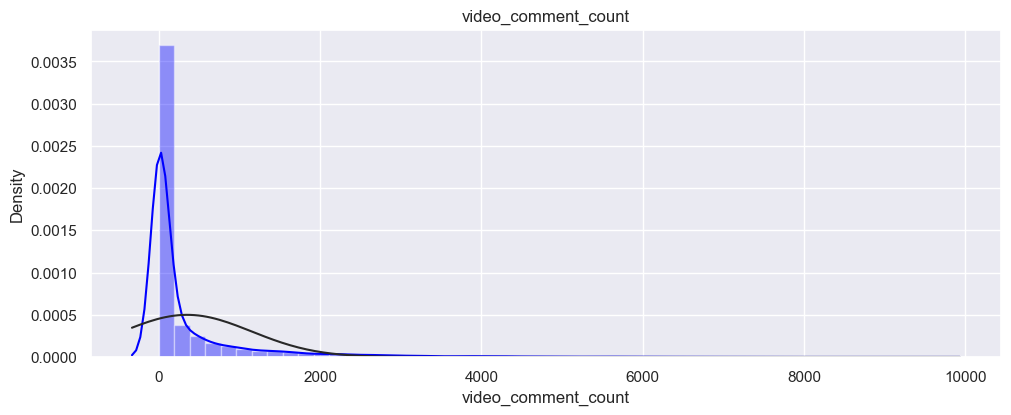

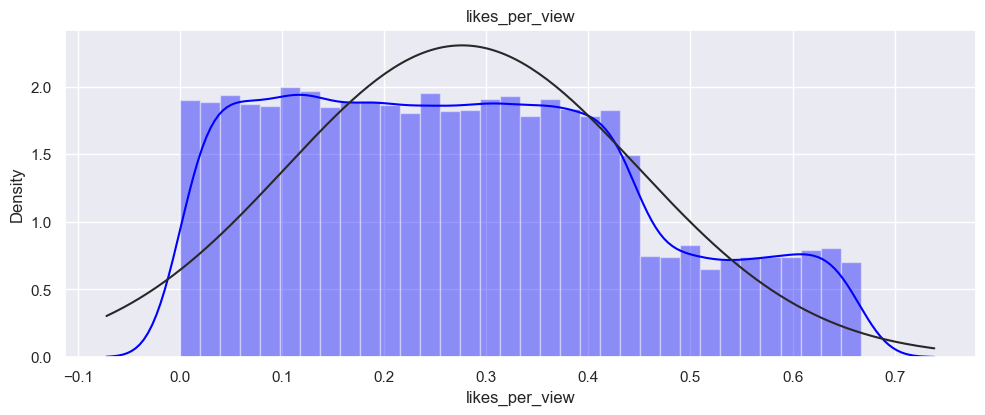

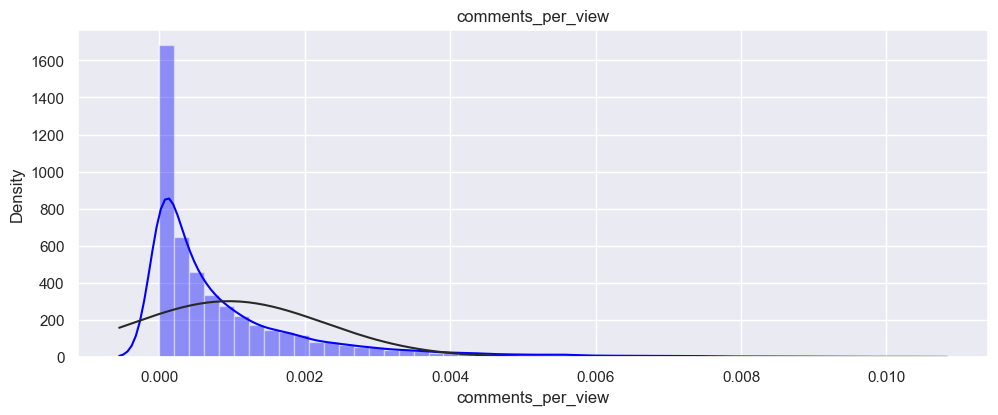

In [76]:
## continious variables
for col in continious[:]:
    plt.figure(figsize = (11.75,4.25))
    sns.distplot(df[col], kde=True, fit=scipy.stats.norm , color='Blue')
    plt.title(col)

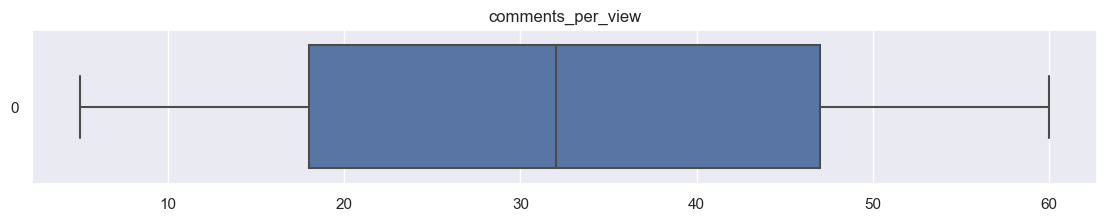

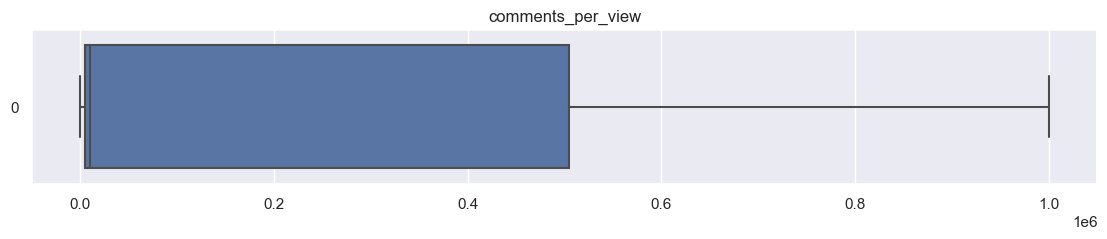

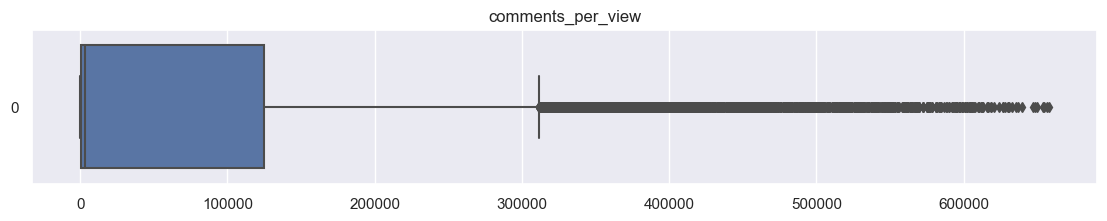

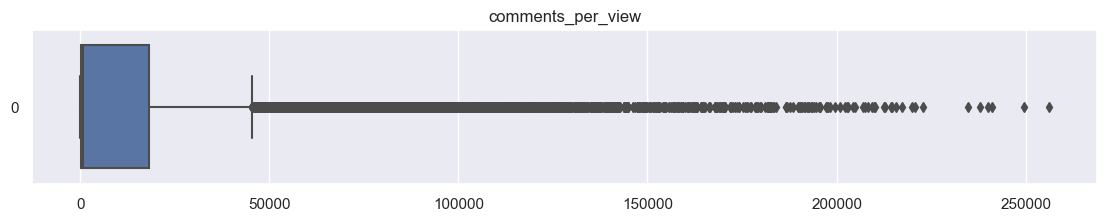

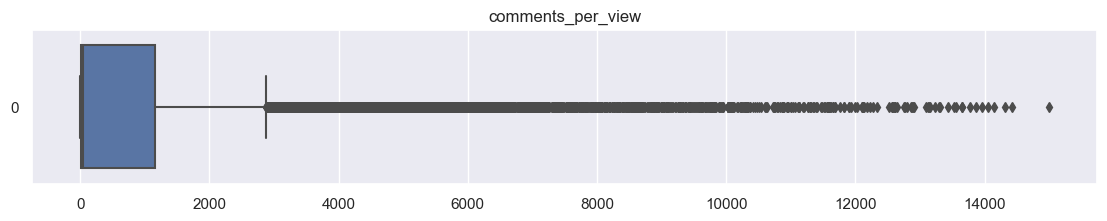

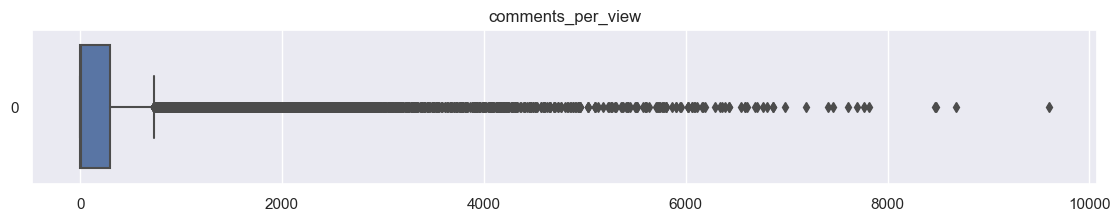

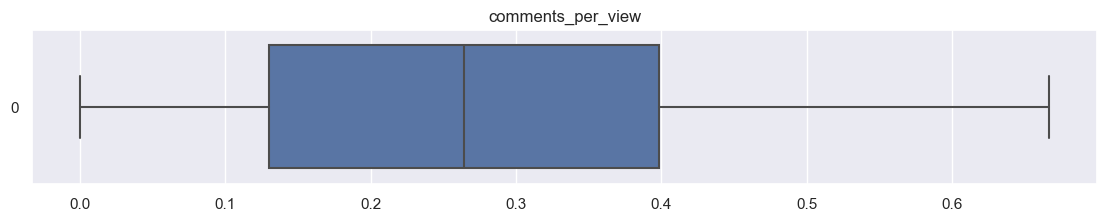

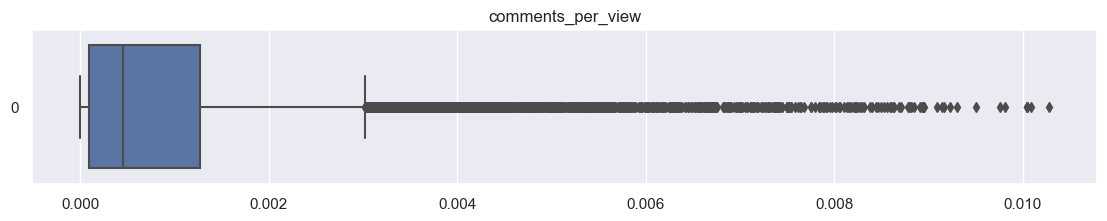

In [77]:
## Observing continious variables with and with out outliers
## Box plots
for i in continious:
    plt.figure(figsize = (13.75, 2))
    sns.boxplot(data=df[i], orient='h');
    plt.title(col)

#### Claim Status vs other categories

-----------------------------------------------
                               claim_status
                                      count
author_ban_status claim_status             
active            claim                6566
                  opinion              8817
banned            claim                1439
                  opinion               196
under review      claim                1603
                  opinion               463
-----------------------------------------------
                          claim_status
                                 count
claim_status claim_status             
claim        claim                9608
opinion      opinion              9476
-----------------------------------------------
                             claim_status
                                    count
verified_status claim_status             
not verified    claim                9399
                opinion              8485
verified        claim                 209
             

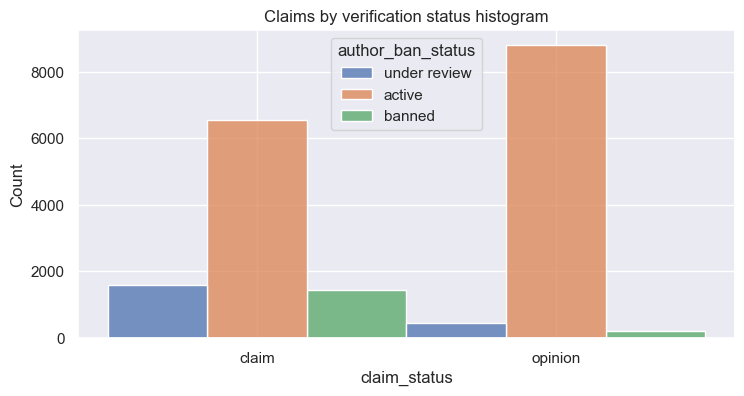

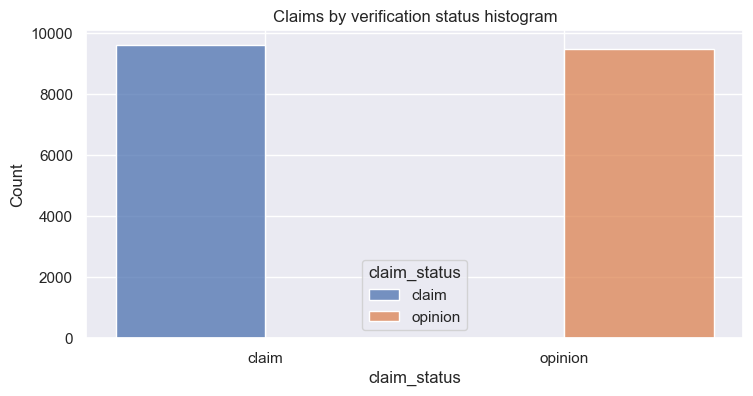

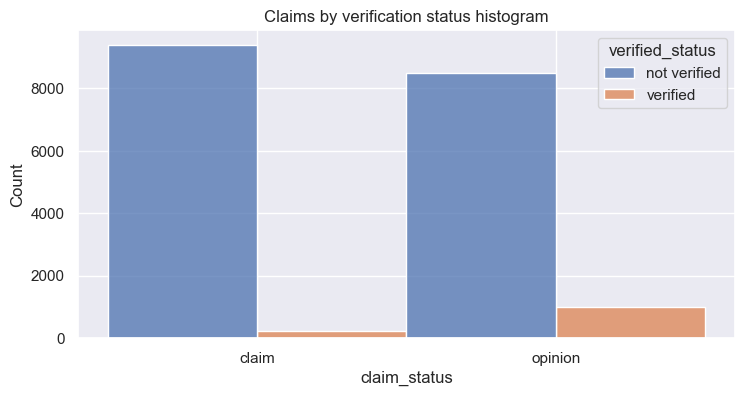

In [78]:
print('-----------------------------------------------')
for column in nominal + binary:
    print(df.groupby([column, 'claim_status']).agg(
    {'claim_status': ['count']}))
    print('-----------------------------------------------')
    plt.figure(figsize = (8.48,4))
    sns.histplot(data=df,
                 x='claim_status',
                 hue=column,
                 multiple='dodge')
    plt.title('Claims by verification status histogram');


#### There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.
#### Claims and Opinios are pretty balanced
#### For both claims and opinions, there are many more active authors than banned authors or authors under review; 
#### The proportion of active authors is far greater for opinion videos than for claim videos. 
#### It seems that authors who post claim videos are more likely to come under review and/or get banned.

#### Median view counts by ban status

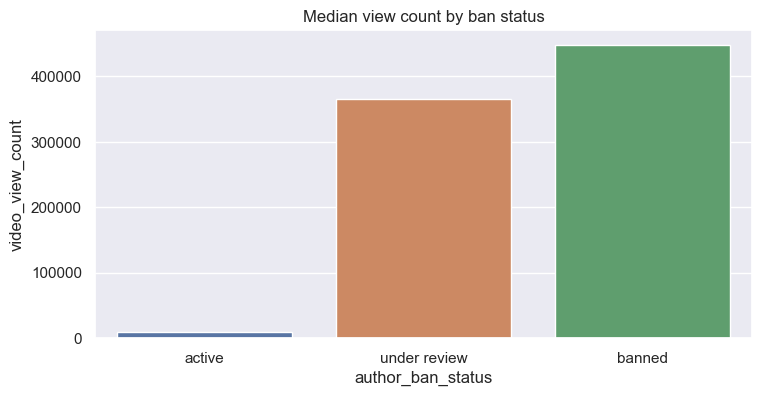

In [79]:
ban_status_counts = df.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

plt.figure(figsize = (8.48,4))
sns.barplot(ban_status_counts,
            x=ban_status_counts['author_ban_status'],
            y=ban_status_counts['video_view_count'],
            order=['active', 'under review', 'banned'],
           )
plt.title('Median view count by ban status');

The median view counts for non-active authors are many times greater than the median view count for active authors. Since you know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64


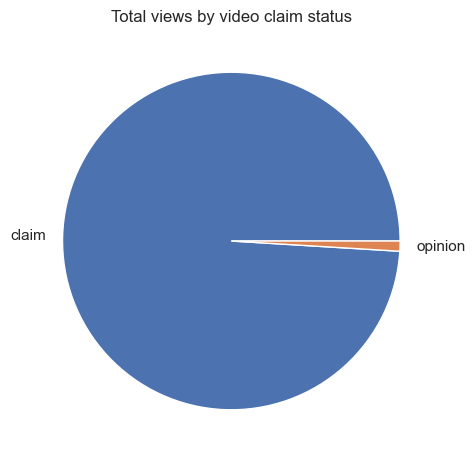

In [80]:
print(df.groupby('claim_status')['video_view_count'].median())
plt.figure(figsize = (5.48,5.48))
plt.pie(df.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

In [81]:
claims  = df[df['claim_status'] == 'claim']
opinions = df[df['claim_status'] == 'opinion']

In [82]:
claims['video_view_count'].describe()

count      9608.000000
mean     501029.452748
std      291349.239825
min        1049.000000
25%      247003.750000
50%      501555.000000
75%      753088.000000
max      999817.000000
Name: video_view_count, dtype: float64

In [83]:
opinions['video_view_count'].describe()

count    9476.000000
mean     4956.432250
std      2885.907219
min        20.000000
25%      2467.000000
50%      4953.000000
75%      7447.250000
max      9998.000000
Name: video_view_count, dtype: float64

#### Both groups seems to be different.

#### Outliers:

In deterministic models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"



In [84]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### Empirical rule
The empirical rule, also sometimes called the three-sigma or 68-95-99.7 rule, is a statistical rule which states that for normally distributed data, almost all observed data will fall within three standard deviations (denoted by the Greek letter sigma, or σ) of the mean or average (represented by the Greek letter mu, or µ) of the data.

In [85]:
eda.empirical(df, 'video_view_count')

,video_view_count,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.79,0.680,0.110
Frac of the values within +/- 2 SD from the mean,0.95,0.950,0.000
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


In [86]:
eda.empirical(df, 'video_like_count')

,video_like_count,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.84,0.680,0.160
Frac of the values within +/- 2 SD from the mean,0.93,0.950,0.020
Frac of the values within +/- 3 SD from the mean,0.98,0.997,0.017


In [87]:
eda.empirical(df, 'video_share_count')

,video_share_count,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.88,0.680,0.200
Frac of the values within +/- 2 SD from the mean,0.94,0.950,0.010
Frac of the values within +/- 3 SD from the mean,0.97,0.997,0.027


In [88]:
eda.empirical(df, 'video_download_count')

,video_download_count,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.88,0.680,0.200
Frac of the values within +/- 2 SD from the mean,0.94,0.950,0.010
Frac of the values within +/- 3 SD from the mean,0.97,0.997,0.027


In [89]:
eda.empirical(df, 'video_comment_count')

,video_comment_count,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.90,0.680,0.220
Frac of the values within +/- 2 SD from the mean,0.95,0.950,0.000
Frac of the values within +/- 3 SD from the mean,0.97,0.997,0.027


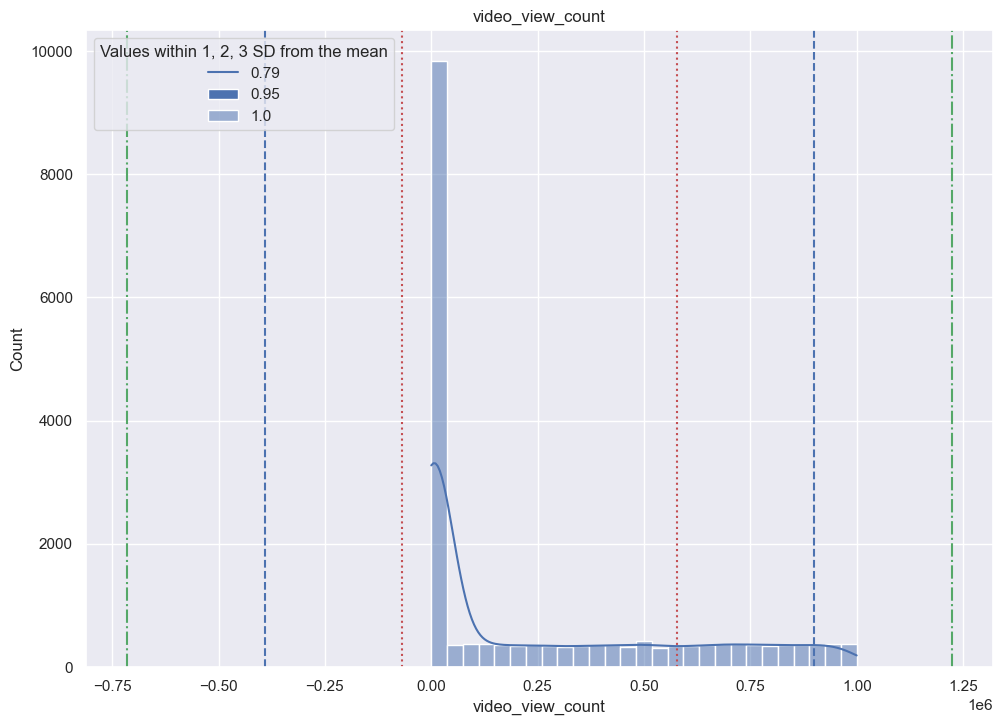

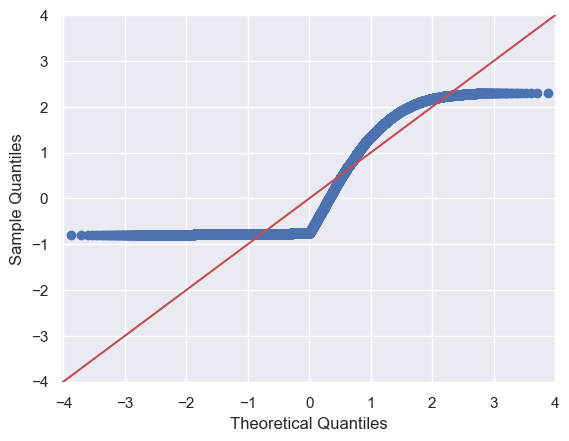

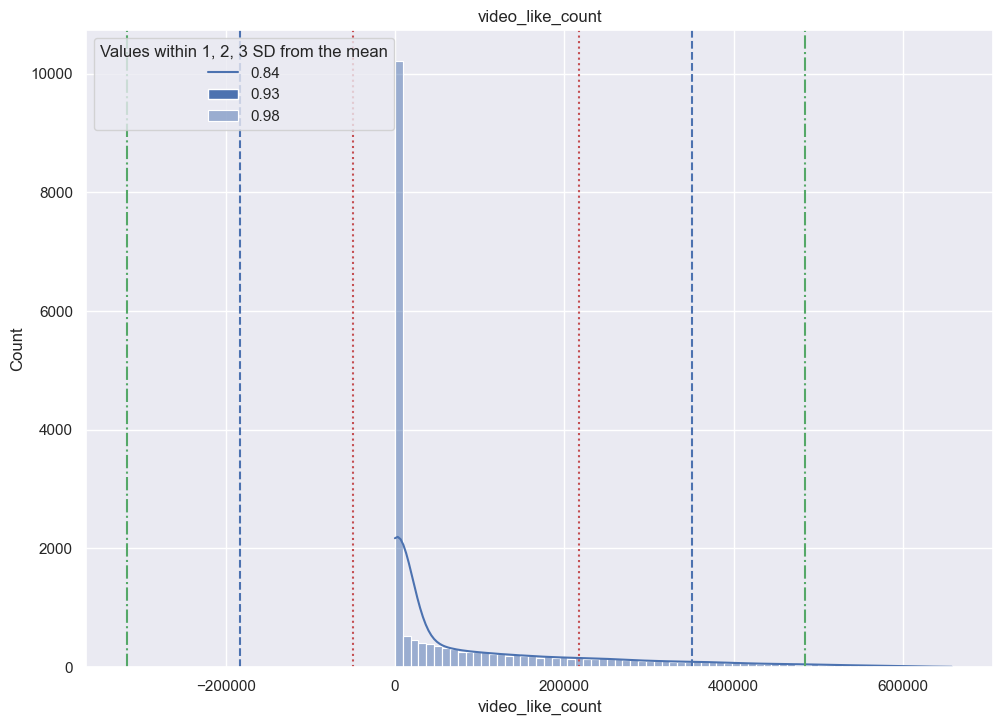

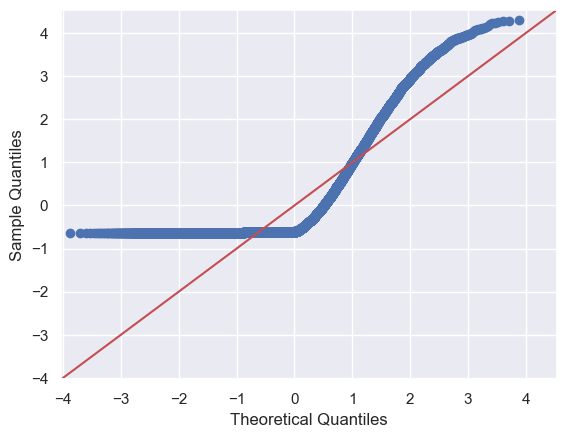

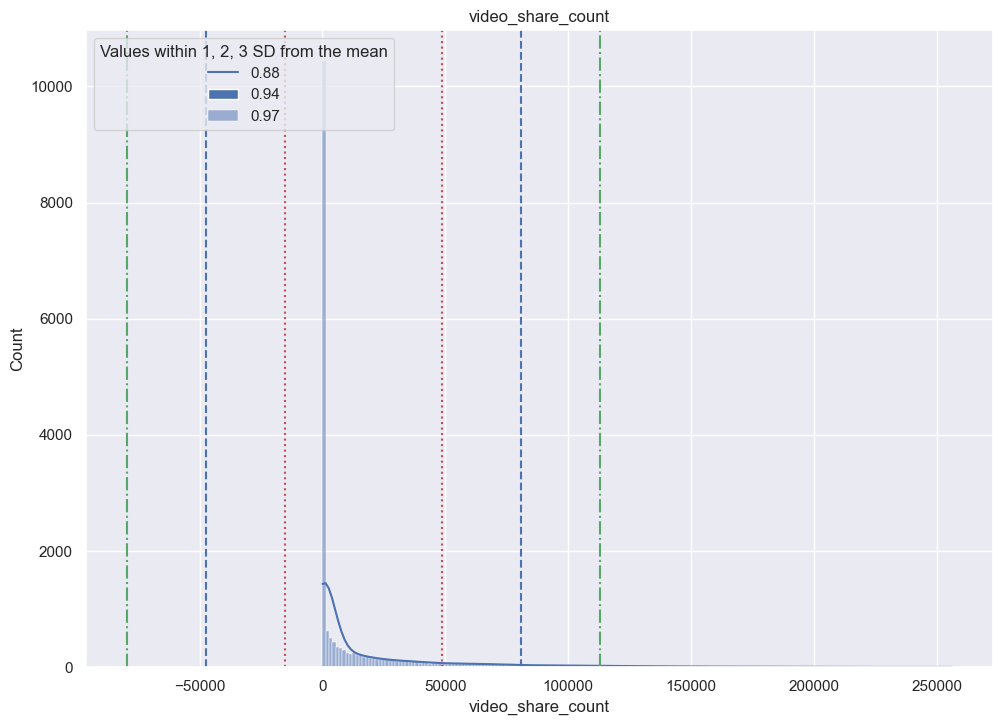

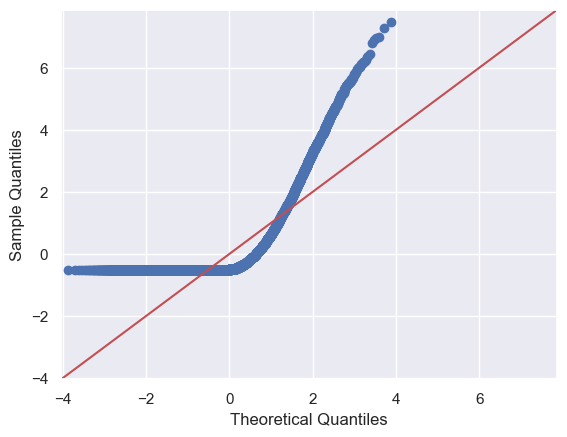

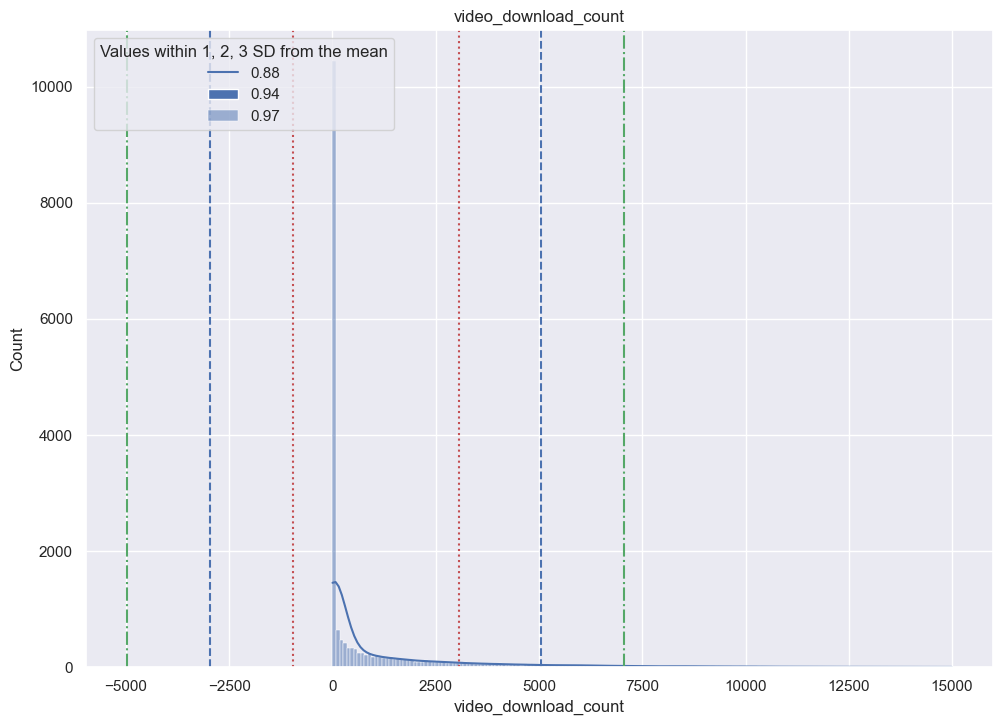

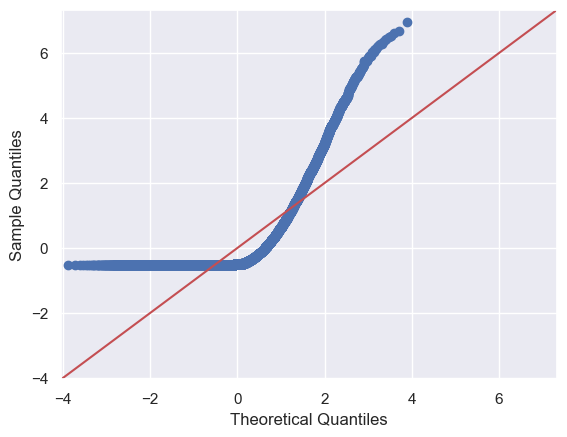

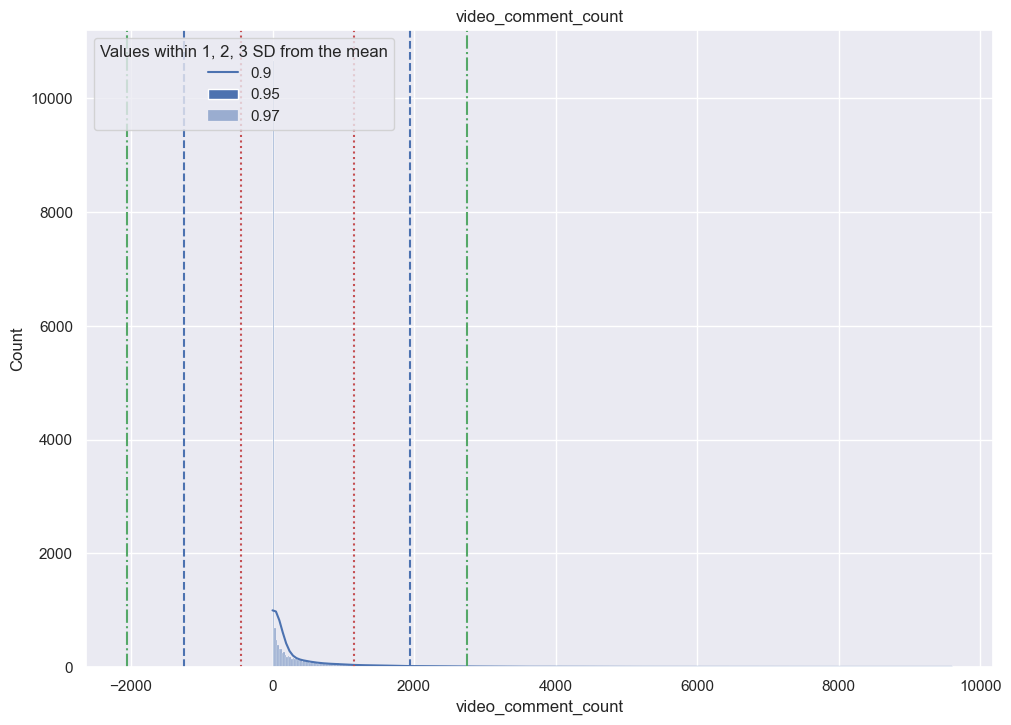

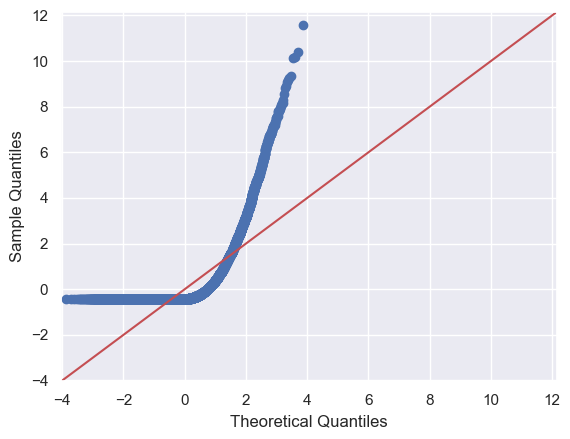

In [90]:
for i in count_cols:
    eda.distribution(df, i)

#### NOTES:

From the observed above we can notice that :

```
'video_view_count',
'video_like_count',
'video_share_count',
'video_download_count',
'video_comment_count',
```

None of them is really normal. Perhaps exponential.
We also have some outliers, but under the terms of a normal distribuited distribution.
Perhaps a log transfomration could bring the examples to a normal distribution.
Cheching on that:

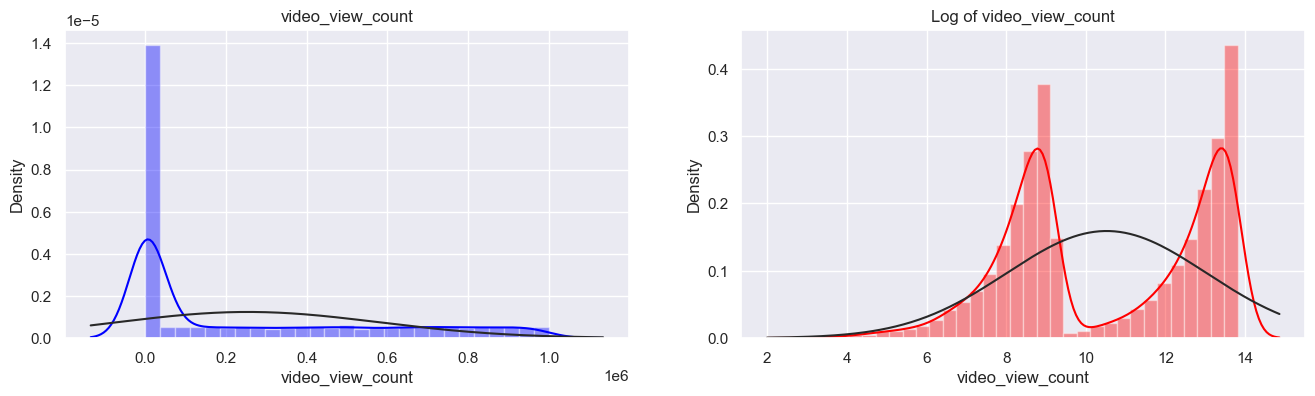

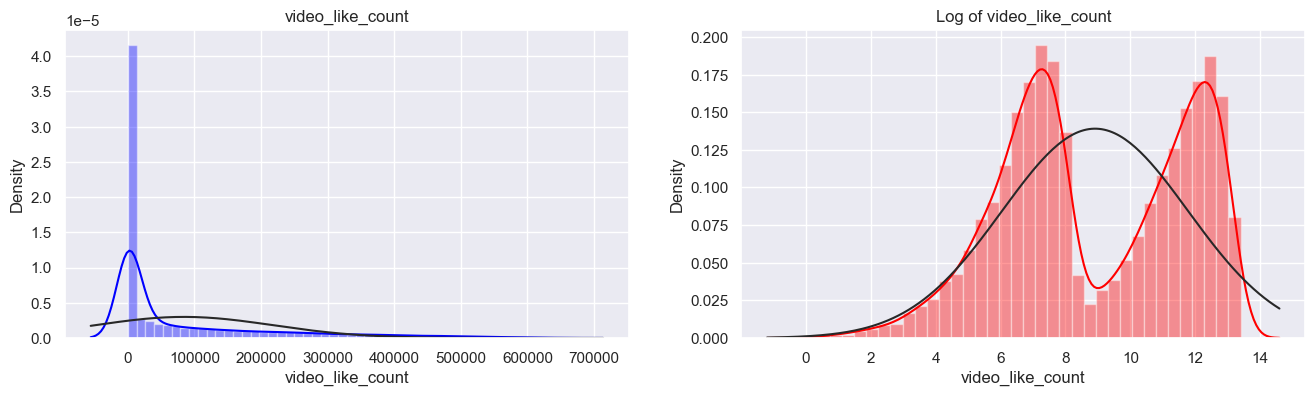

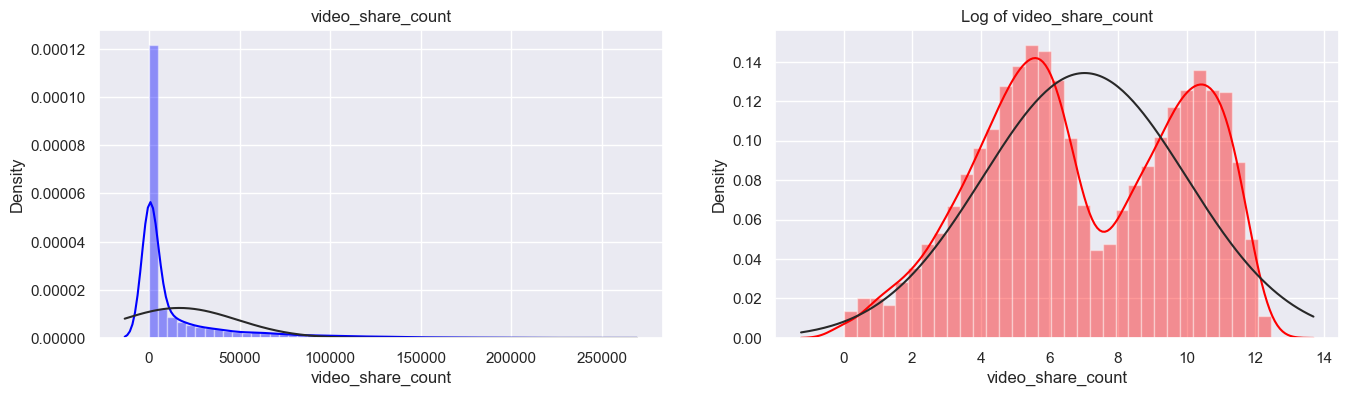

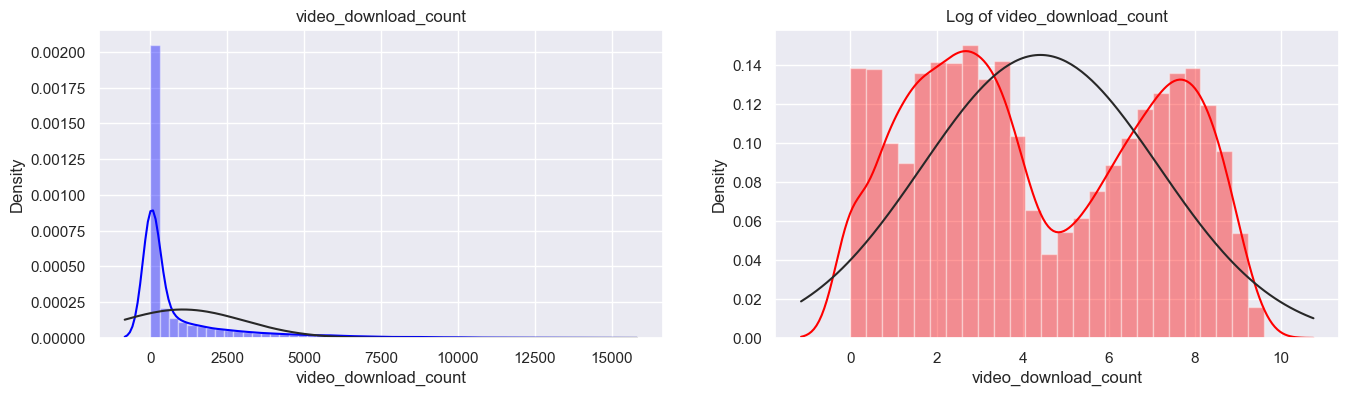

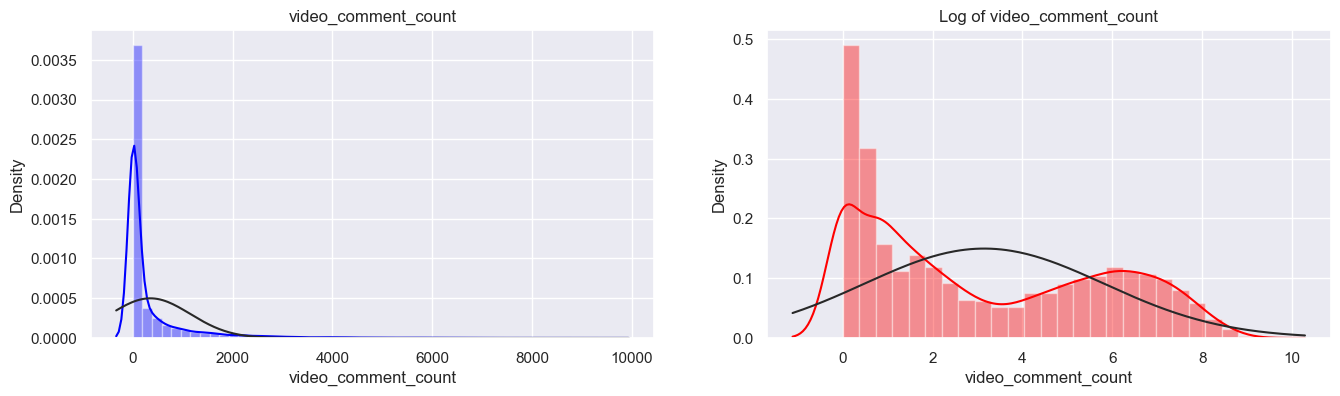

In [92]:

## Comparnig current distribution to its log.
## This np.1plog is not a regular log and does not return inf when looking for the log of 0.
for i in count_cols:
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(df[i], kde=True, fit=scipy.stats.norm , color='Blue') 
    plt.title(i)
    plt.subplot(1, 2, 2)
    sns.distplot(np.log1p(df[i]), kde=True, fit=scipy.stats.norm, color='Red') ## fits is deprecated, still good to demo.
    plt.title('Log of '+i);

#### Not the aspire normal transformation, bur still valid.


#### Compute z-scores to find outliers

- A z-score is a measure of how many standard deviations below or above the population mean a data point is. 

- A z-score is useful because it tells you where a value lies in a distribution.

- Typically, we consider observations with a z-score smaller than -3 or larger than +3 as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean.

- To find outliers in the data, we will first create a new column called Z_SCORE that includes the z-scores for each district literacy rate in your dataset. Recall that the OVERALL_LI column lists all the district literacy rates.

- Then, we compute the z-scores using the function `scipy.stats.zscore()`.

In [ ]:
['video_view_count',
'video_like_count',
'video_share_count',
'video_download_count',
'video_comment_count']

## Where are those outliers?
Capturing the values outside the range.

In [ ]:
for i in count_cols:
    df['zScore'+i] = stats.zscore(df[i])

In [ ]:
df[(df['zScorevideo_view_count'] > 3) | (df['zScorevideo_view_count'] < -3)].shape

In [ ]:
df[(df['zScorevideo_like_count'] > 3) | (df['zScorevideo_like_count'] < -3)].shape

In [ ]:
df[(df['zScorevideo_share_count'] > 3) | (df['zScorevideo_share_count'] < -3)].shape

In [ ]:
df[(df['zScorevideo_download_count'] > 3) | (df['zScorevideo_download_count'] < -3)].shape

In [ ]:
df[(df['zScorevideo_comment_count'] > 3) | (df['zScorevideo_comment_count'] < -3)].shape

In [ ]:
df[(df['zScorevideo_comment_count'] > 3) | (df['zScorevideo_comment_count'] < -3)]

#### Scatter plot

In [ ]:
## Scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
plt.figure(figsize = (14.48,5.48))
sns.scatterplot(x=df['video_view_count'], y=df['video_like_count'],
                hue=df['claim_status'],
                alpha=0.5)
plt.show()

In [ ]:
# Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only
opinion = df[df['claim_status'] == 'opinion']
plt.figure(figsize = (14.48,5.48))
sns.scatterplot(x=opinion['video_view_count'], y=opinion['video_like_count'],
                 alpha=0.5)
plt.show()

#### Conclusion

We have observed:

    - Data types.
    - Missing information.
    - Validate inputs.
    - Distributions.
    - Determinate Outliers

Are we keeping outliers?

Probably, maybe for a deterministic model, we eliminate.
For stochastic models, we may keep.

**Visuals and techniques** Included in this notebook:

- Counts per claim or opinion in the pie chart
- Count per category
- Distribution of continuous variables
- Box-plot of continuous variables
- Bar plots showing distribution of claims with respect to other categorical values.
- Median view counts by ban status
- Total views by video claim status
- Scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
- Empirical rule and the difference between our data and visualization.
- Compute z-scores to find outliers
- Observe Logarithmical transformations
- Detected outliers per columns:

```
count_cols = [
              'video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
]
```

**Keys to success**

Keep options open, have clean and checked for errors, and corrected data.
We could use NLP to obtain information from the text column.

**Next Steps**

Further deeper exploration, perhaps we keep missing values.